# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('geo_comment.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


Дублируется один столбец, можно удалить 

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)  


In [4]:
data.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              70382 non-null  float64
 1   y              70382 non-null  float64
 2   comment_class  70382 non-null  int64  
 3   multiplier     70382 non-null  int64  
 4   comment        70382 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
# пропусков нет

In [6]:
# Описание dataseta

data.describe()

,x,y,comment_class,multiplier
count,70382.000000,70382.000000,70382.000000,70382.000000
mean,37.588417,55.786013,-0.663835,1.545935
std,0.138217,0.066225,0.747885,16.986786
min,37.148813,55.496939,-1.000000,1.000000
25%,37.445608,55.743558,-1.000000,1.000000
50%,37.570887,55.792331,-1.000000,1.000000
75%,37.702822,55.848665,-1.000000,1.000000
max,37.931228,55.994174,1.000000,1500.000000


стандартное отклонение по координатам х и y не большие , выбросы не большие.

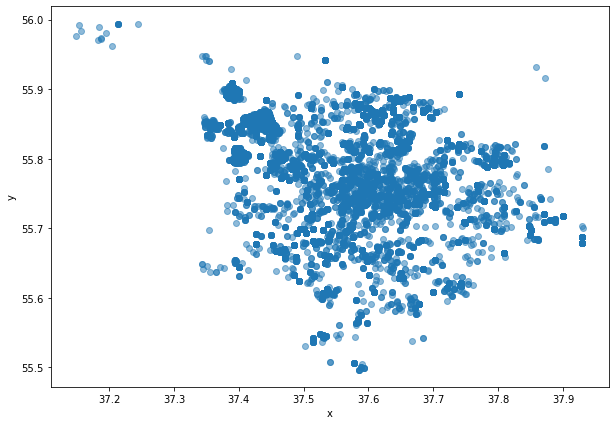

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(data['x'], data['y'], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Попробуем провести кластеризацию безотносительно голосов

теперь кластеризуем с помощью различных методов

In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
data_coordin = data[['x', 'y']]

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_coordin)

In [11]:
dbscan = DBSCAN()

In [12]:
clusters = dbscan.fit_predict(data_scaled)

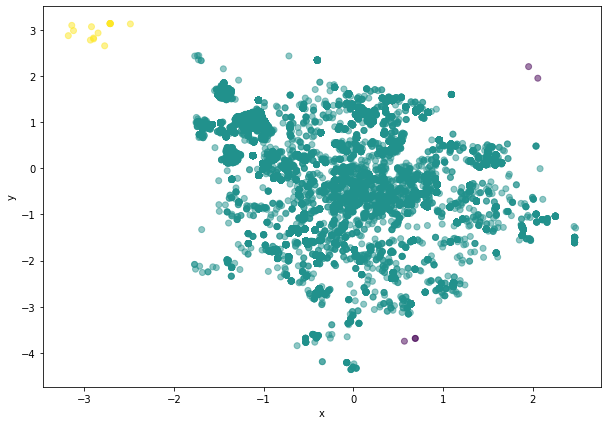

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],c=clusters, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

K-means

In [15]:
# количество кластеров  зададим 8
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(data_scaled)

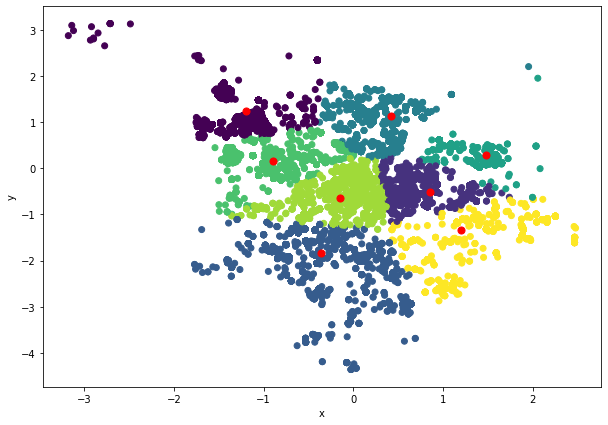

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],c=clusters)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# рассчиитываем оптимальное количество класстеров

In [17]:
k_inertia = []
ks = range(1,30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

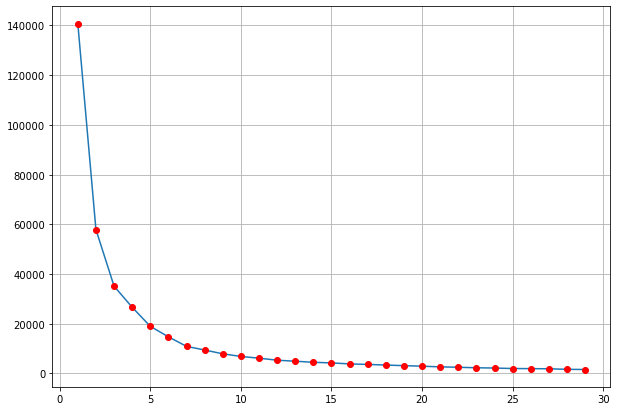

In [18]:
plt.figure(figsize=(10,7))
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')
plt.grid()

In [ ]:
# кривая переходит в прямую горизонталь на 5 точке, значит оптимальное значение кластеров 5

In [19]:
# количество кластеров  зададим 5
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data_scaled)

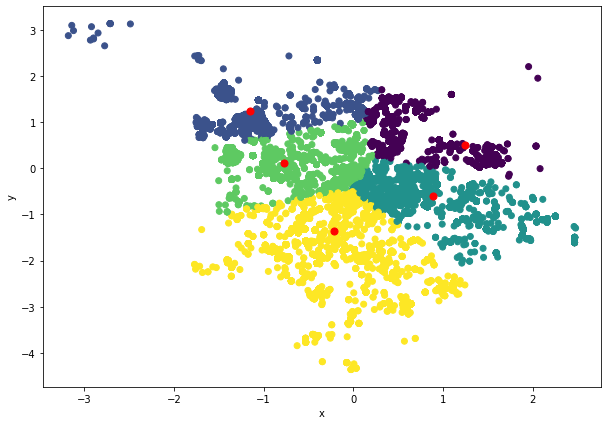

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],c=clusters)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Исследуем голоса за и против по отдельности

 применим метод K-Means

Выделим интересующие нас подгруппы даных, стандартизируем значения в них 
и рассчитаем оптимальное количество кластеров для обеих подгрупп

In [21]:
data_posit = data[data.comment_class == 1]
data_negat = data[data.comment_class == -1]

In [22]:
data_posit = data_posit[['x', 'y']]
data_negat = data_negat[['x', 'y']]
data_posit = scaler.fit_transform(data_posit)
data_negat = scaler.fit_transform(data_negat)

In [26]:
k_inertia_posit = []
k_inertia_negat = []
ks = range(1,25)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans_posit = clf_kmeans.fit_predict(data_posit )
    k_inertia_posit.append(clf_kmeans.inertia_)
    clusters_kmeans_negat = clf_kmeans.fit_predict(data_negat )
    k_inertia_negat.append(clf_kmeans.inertia_)

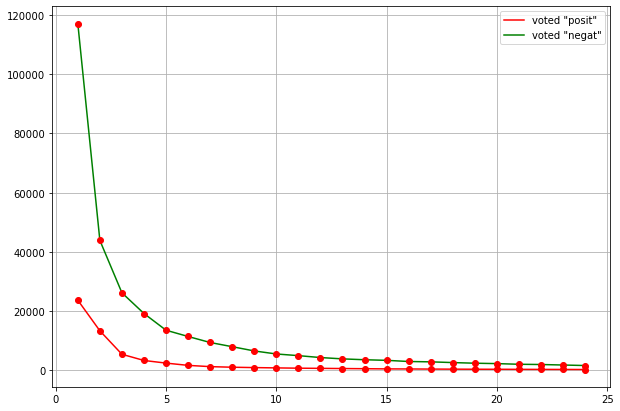

In [27]:
plt.figure(figsize=(10,7))
plt.plot(ks, k_inertia_posit, color='red', label='voted "posit"')
plt.plot(ks, k_inertia_posit, 'ro')
plt.plot(ks, k_inertia_negat, color='green', label='voted "negat"')
plt.plot(ks, k_inertia_negat, 'ro')
plt.legend()
plt.grid()

In [ ]:
Голоса "за"  - точка изгиба 3,  голоса "против" -  точка изгиба 5.

In [28]:
kmeans_posit = KMeans(n_clusters=3)
clusters_posit = kmeans_posit.fit_predict(data_posit) 

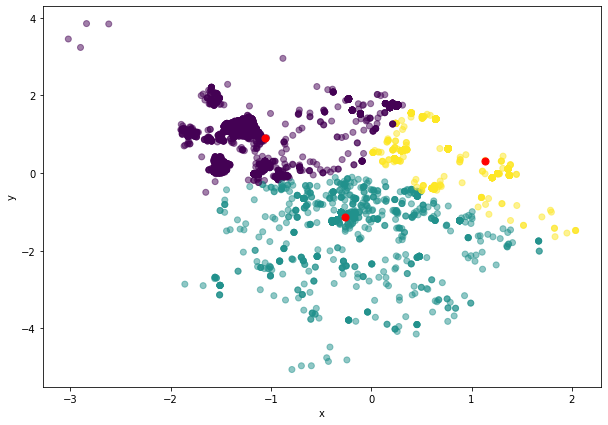

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(data_posit[:, 0], data_posit[:, 1],c=clusters_posit, alpha=0.5)
centers = kmeans_posit.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
kmeans_negat = KMeans(n_clusters=5)
clusters_negat = kmeans_negat.fit_predict(data_negat) 

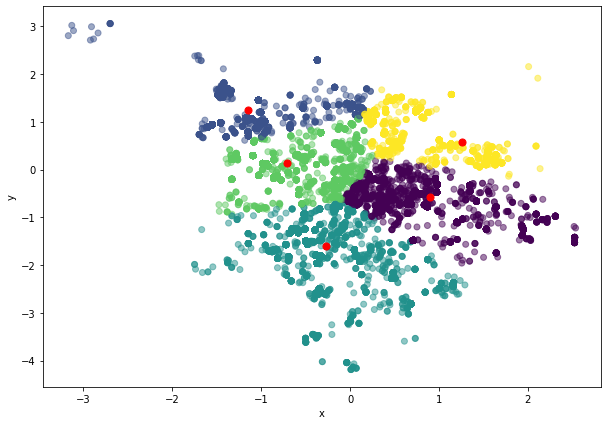

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(data_negat[:, 0], data_negat[:, 1],c=clusters_negat, alpha=0.5)
centers = kmeans_negat.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()